# Wego Project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
wego = pd.read_csv('../data/Headway Data, 8-1-2023 to 9-30-2023.csv')

In [4]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [5]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

## 1) What is the overall on-time performance, and what do the overall distribution of adherance look like?

In [7]:
wego['ADJUSTED_EARLY_COUNT'].value_counts()

ADJUSTED_EARLY_COUNT
0    340554
1      9775
Name: count, dtype: int64

In [8]:
wego['ADJUSTED_LATE_COUNT'].value_counts()

ADJUSTED_LATE_COUNT
0    291291
1     59038
Name: count, dtype: int64

In [9]:
wego['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    270048
0     80281
Name: count, dtype: int64

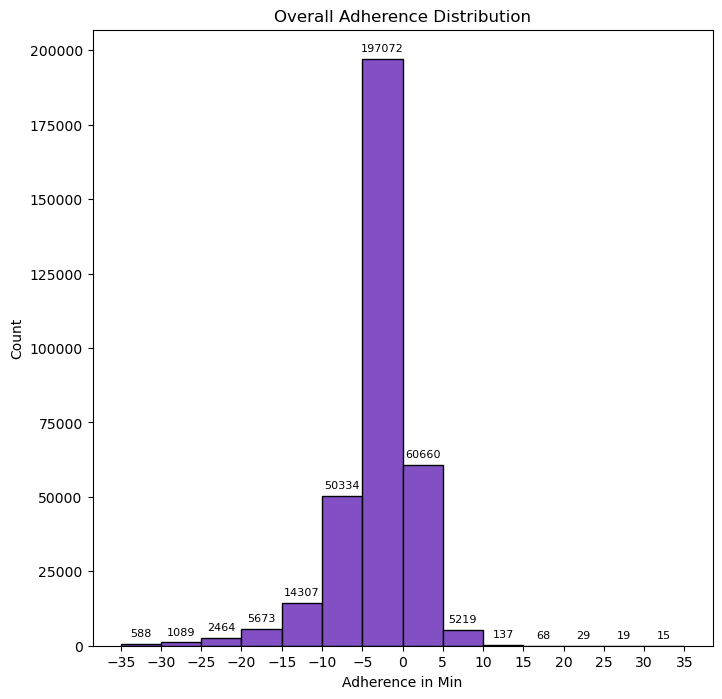

In [10]:
bins = [-35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35]

fig, ax = plt.subplots(figsize=(8,8))
ax.hist(wego['ADHERENCE'], bins=bins, edgecolor='black', color='#8250C4')
plt.xticks(bins)
plt.xlabel('Adherence in Min')
plt.ylabel('Count')
plt.title('Overall Adherence Distribution')

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 4), fontsize=8, textcoords='offset points', ha='center', va='bottom')

plt.savefig('../images/overall_adherence_hist.png')

## 2) How does direction of travel, route, or location effect the on-time performance?

### Direction of Travel

In [13]:
from_downtown = wego.loc[wego['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN']

In [14]:
to_downtown = wego.loc[wego['ROUTE_DIRECTION_NAME']=='TO DOWNTOWN']

In [15]:
f_dt_ontime = from_downtown['ADJUSTED_ONTIME_COUNT'].value_counts().reset_index()

In [16]:
f_dt_early = from_downtown['ADJUSTED_EARLY_COUNT'].value_counts().reset_index()

In [17]:
f_dt_late = from_downtown['ADJUSTED_LATE_COUNT'].value_counts().reset_index()

In [18]:
t_dt_ontime = to_downtown['ADJUSTED_ONTIME_COUNT'].value_counts().reset_index()

In [19]:
t_dt_early = to_downtown['ADJUSTED_EARLY_COUNT'].value_counts().reset_index()

In [20]:
t_dt_late = to_downtown['ADJUSTED_LATE_COUNT'].value_counts().reset_index()

In [21]:
f_dt_ontime = f_dt_ontime.rename(columns = {'count':'Ontime Count'})

In [22]:
f_dt_early = f_dt_early.rename(columns = {'count':'Early Count'})

In [23]:
f_dt_late = f_dt_late.rename(columns = {'count':'Late Count'})

In [24]:
t_dt_ontime = t_dt_ontime.rename(columns = {'count':'Ontime Count'})

In [25]:
t_dt_early = t_dt_early.rename(columns = {'count':'Early Count'})

In [26]:
t_dt_late = t_dt_late.rename(columns = {'count':'Late Count'})

In [27]:
from_downtown_merged = pd.concat([f_dt_ontime, f_dt_early, f_dt_late], axis=1)

In [28]:
to_downtown_merged = pd.concat([t_dt_ontime, t_dt_early, t_dt_late], axis=1)

In [29]:
from_downtown_merged.to_csv('../data/from_downtown_performace.csv')

In [30]:
from_downtown_merged.head()

,ADJUSTED_ONTIME_COUNT,Ontime Count,ADJUSTED_EARLY_COUNT,Early Count,ADJUSTED_LATE_COUNT,Late Count
0,1,134414,0,180502,0,146192
1,0,51379,1,5291,1,39601


In [31]:
to_downtown_merged.to_csv('../data/to_downtown_performance.csv')

In [32]:
to_downtown_merged.head()

,ADJUSTED_ONTIME_COUNT,Ontime Count,ADJUSTED_EARLY_COUNT,Early Count,ADJUSTED_LATE_COUNT,Late Count
0,1,135634,0,160052,0,145099
1,0,28902,1,4484,1,19437


### Route

In [34]:
ontime = wego.loc[wego['ADJUSTED_ONTIME_COUNT']==1]

In [35]:
early = wego.loc[wego['ADJUSTED_EARLY_COUNT']==1]

In [36]:
late = wego.loc[wego['ADJUSTED_LATE_COUNT']==1]

In [37]:
route_ontime = ontime['ROUTE_ABBR'].value_counts().reset_index()

In [38]:
route_ontime = route_ontime.rename(columns = {'count':'Ontime Count'})

In [39]:
route_early = early['ROUTE_ABBR'].value_counts().reset_index()

In [40]:
route_early = route_early.rename(columns = {'count':'Early Count'})

In [41]:
route_late = late['ROUTE_ABBR'].value_counts().reset_index()

In [42]:
route_late = route_late.rename(columns = {'count':'Late Count'})

In [43]:
route_merged = pd.merge(route_ontime, route_early,
         on = 'ROUTE_ABBR', how = 'inner')

In [44]:
route_final = pd.merge(route_merged, route_late,
         on = 'ROUTE_ABBR', how = 'inner')

In [45]:
route_names = {
    3:'West End', 
    7:'Hillsboro', 
    22:'Bordeaux', 
    23:'Dickerson Pike', 
    50:'Charlotte Pike', 
    52:'Nolensville Pike', 
    55:'Murfreesboro Pike', 
    56:'Gallatin Pike'}

route_final = route_final.replace({'ROUTE_ABBR':route_names})
route_final = route_final.rename(columns = {'ROUTE_ABBR':'Route Name'})

In [46]:
route_final.to_csv('../data/route_performance.csv')

In [47]:
route_final.head()

,Route Name,Ontime Count,Early Count,Late Count
0,Gallatin Pike,48361,1752,8837
1,Murfreesboro Pike,42080,1531,16748
2,Nolensville Pike,37736,1553,10038
3,Charlotte Pike,36309,1207,5113
4,Dickerson Pike,35137,1286,3230


### Stop Location

In [49]:
tp_ontime = ontime['TIME_POINT_ABBR'].value_counts().reset_index()

In [50]:
tp_early = early['TIME_POINT_ABBR'].value_counts().reset_index()

In [51]:
tp_late = late['TIME_POINT_ABBR'].value_counts().reset_index()

In [52]:
tp_ontime = tp_ontime.rename(columns = {'count':'Ontime Count'})

In [53]:
tp_early = tp_early.rename(columns = {'count':'Early Count'})

In [54]:
tp_early['Early Count'] = tp_early['Early Count'].astype(int)

In [55]:
tp_late = tp_late.rename(columns = {'count':'Late Count'})

In [56]:
tp_merged = pd.merge(tp_ontime, tp_early,
         on = 'TIME_POINT_ABBR', how = 'left')

In [57]:
tp_final = pd.merge(tp_merged, tp_late,
                    on = 'TIME_POINT_ABBR', how = 'left')

In [58]:
tp_final = tp_final.fillna(0)

In [59]:
tp_final['Early Count'] = tp_final['Early Count'].astype(int)

In [60]:
tp_final['Total Count'] = tp_final.sum(axis=1, numeric_only = True)

In [61]:
tp_and_route = wego[['TIME_POINT_ABBR', 'ROUTE_ABBR']].drop_duplicates()

In [62]:
tp_final = pd.merge(tp_final, tp_and_route,
         on = 'TIME_POINT_ABBR', how = 'left')

In [63]:
tp_final = tp_final[['TIME_POINT_ABBR', 'ROUTE_ABBR', 'Ontime Count', 'Early Count', 'Late Count', 'Total Count']]

In [64]:
tp_final = tp_final.rename(columns = {'TIME_POINT_ABBR':'Time Point', 'ROUTE_ABBR':'Route'})

In [65]:
tp_final = tp_final.sort_values(by = 'Route').reset_index(drop=True)

In [66]:
tp_final.to_csv('../data/time_point_performance.csv')

In [67]:
tp_final.head()

,Time Point,Route,Ontime Count,Early Count,Late Count,Total Count
0,WHBG,3,8868,358,2128,11354
1,WE23,3,6072,354,1865,8291
2,HRWB,3,6115,334,1850,8299
3,WE31,3,6136,309,1852,8297
4,MP&R,3,3299,57,671,4027


## 3) How does time of day or day of week effect on-time performance?

### Time of Day

In [70]:
time_of_day = wego[['ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT',
      'ADJUSTED_ONTIME_COUNT']]

In [71]:
time_of_day['Hour'] = time_of_day['ACTUAL_DEPARTURE_TIME'].str[11:]

C:\Users\jbreu\AppData\Local\Temp\ipykernel_10612\3542830880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_of_day['Hour'] = time_of_day['ACTUAL_DEPARTURE_TIME'].str[11:]


In [72]:
time_of_day['Hour'] = time_of_day['Hour'].str[:2]

C:\Users\jbreu\AppData\Local\Temp\ipykernel_10612\3819230712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_of_day['Hour'] = time_of_day['Hour'].str[:2]


In [73]:
tod_early = time_of_day.groupby('Hour')['ADJUSTED_EARLY_COUNT'].sum().to_frame().reset_index()

In [74]:
tod_late = time_of_day.groupby('Hour')['ADJUSTED_LATE_COUNT'].sum().to_frame().reset_index()

In [75]:
tod_ontime = time_of_day.groupby('Hour')['ADJUSTED_ONTIME_COUNT'].sum().to_frame().reset_index()

In [76]:
tod_merged = pd.merge(tod_early, tod_late,
         on = 'Hour', how = 'inner')

In [77]:
tod_final = pd.merge(tod_merged, tod_ontime,
         on = 'Hour', how = 'inner')

In [78]:
tod_final.to_csv('../data/time_of_day_performance.csv')

In [79]:
tod_final.head()

,Hour,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,00,344,1067,2898
1,01,22,110,77
2,04,90,16,1591
3,05,403,356,9205
4,06,516,1196,17110


### Day of the Week

In [81]:
day_of_week = wego

In [82]:
day_of_week['DATE'] = pd.to_datetime(day_of_week['DATE'])

In [83]:
day_of_week = day_of_week.assign(weekday = day_of_week['DATE'].dt.day_name())

In [84]:
dow_early = day_of_week.groupby('weekday')['ADJUSTED_EARLY_COUNT'].sum().to_frame().reset_index()

In [85]:
dow_late = day_of_week.groupby('weekday')['ADJUSTED_LATE_COUNT'].sum().to_frame().reset_index()

In [86]:
dow_ontime = day_of_week.groupby('weekday')['ADJUSTED_ONTIME_COUNT'].sum().to_frame().reset_index()

In [87]:
dow_merged = pd.merge(dow_early, dow_late,
         on = 'weekday', how = 'inner')

In [88]:
dow_final = pd.merge(dow_merged, dow_ontime,
         on = 'weekday', how = 'inner')

In [89]:
sorted_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_final['weekday'] = pd.Categorical(dow_final['weekday'], sorted_weekdays)
dow_final = dow_final.sort_values('weekday')

In [90]:
dow_final.to_csv('../data/day_of_week_performance.csv')

In [91]:
dow_final.head()

,weekday,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
1,Monday,1665,6005,40319
5,Tuesday,1685,9587,45502
6,Wednesday,1635,10297,45009
4,Thursday,1570,10667,44030
0,Friday,1552,12389,41973


## 5) Is there any relationship between lateness (ADHERENCE) and headway deviation? The headway deviation variable is contained in the HDWY_DEV column. See the notes under number 9 for a description of headway and headway deviation.

### Total Adherence vs Headway DEV

In [93]:
headway = wego[['HDWY_DEV', 'ADHERENCE']]

In [94]:
headway = headway.dropna()

In [95]:
headway.head()

,HDWY_DEV,ADHERENCE
7,2.666666,-1.716666
8,1.966666,-1.916666
9,-0.483334,-0.183333
11,-2.166667,-1.316666
12,-3.883334,1.500000


In [96]:
headway[['HDWY_DEV', 'ADHERENCE']].corr()

,HDWY_DEV,ADHERENCE
HDWY_DEV,1.000000,-0.206794
ADHERENCE,-0.206794,1.000000


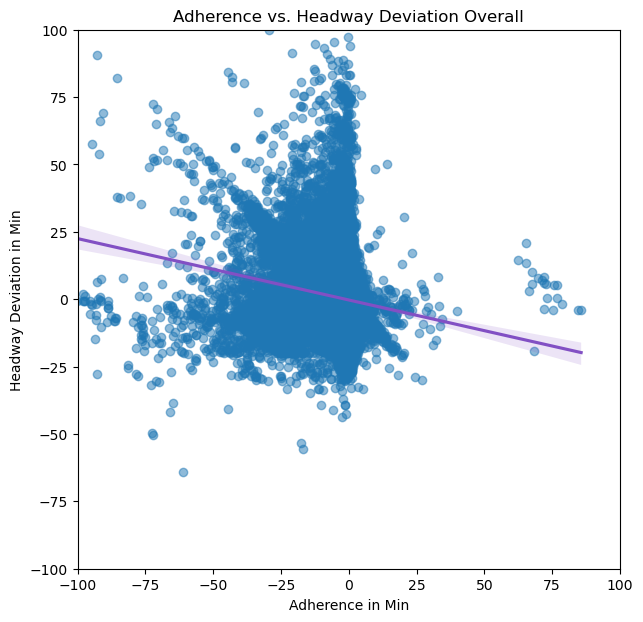

In [97]:
fig, ax = plt.subplots(figsize = (7, 7))
sns.regplot(
    x = headway['ADHERENCE'],
    y = headway['HDWY_DEV'],
    line_kws = {'color':'#8250C4'},
    scatter_kws = {'alpha':0.5},
    ax = ax)
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.title('Adherence vs. Headway Deviation Overall')
plt.xlabel('Adherence in Min')
plt.ylabel('Headway Deviation in Min')
plt.show()

### Adherence vs. Headway DEV of Not Ontime Departures

In [98]:
headway = wego[['HDWY_DEV', 'ADHERENCE', 'ADJUSTED_ONTIME_COUNT', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT']]

In [99]:
headway = headway.dropna()

In [100]:
not_ontime = headway.loc[(headway['ADJUSTED_EARLY_COUNT'] == 1) | (headway['ADJUSTED_LATE_COUNT'] == 1)]

In [101]:
for index, row in not_ontime.iterrows():
    if row.ADJUSTED_EARLY_COUNT == 1:
        not_ontime.loc[index, 'Late/Early'] = 'Early'
    elif row.ADJUSTED_LATE_COUNT == 1:
        not_ontime.loc[index, 'Late/Early'] = 'Late'
    else:
         not_ontime.loc[index, 'Late/Early'] = 'Neither'

C:\Users\jbreu\AppData\Local\Temp\ipykernel_10612\4182408194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_ontime.loc[index, 'Late/Early'] = 'Early'


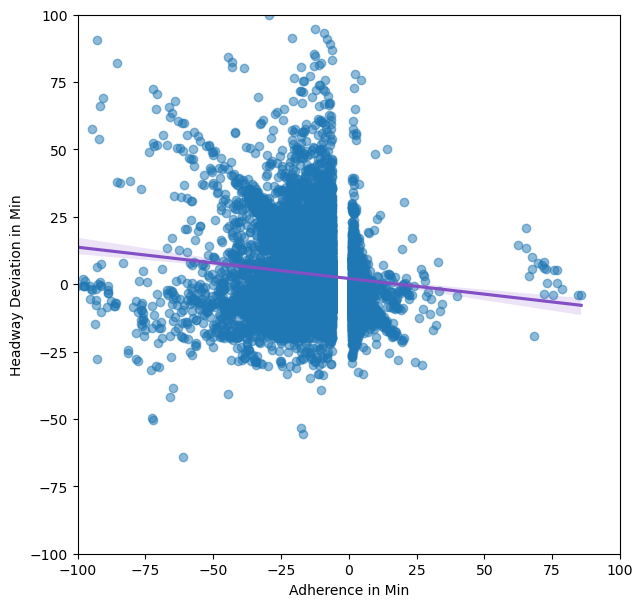

In [316]:
fig, ax = plt.subplots(figsize = (7, 7))
sns.regplot(
    x = not_ontime['ADHERENCE'],
    y = not_ontime['HDWY_DEV'],
    line_kws = {'color':'#8250C4'},
    scatter_kws = {'alpha':0.5},
    ax = ax)
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.xlabel('Adherence in Min')
plt.ylabel('Headway Deviation in Min')
plt.show()

### Stats

In [255]:
not_ontime[['HDWY_DEV', 'ADHERENCE']].corr()

,HDWY_DEV,ADHERENCE
HDWY_DEV,1.000000,-0.148146
ADHERENCE,-0.148146,1.000000


In [428]:
wego['ADJUSTED_EARLY_COUNT'].sum()

9775

In [430]:
wego['ADJUSTED_LATE_COUNT'].sum()

59038

In [436]:
wego['ADJUSTED_ONTIME_COUNT'].sum()

270048

In [330]:
total_departures = wego['ADJUSTED_ONTIME_COUNT'].sum()+wego['ADJUSTED_EARLY_COUNT'].sum()+wego['ADJUSTED_LATE_COUNT'].sum()

In [332]:
total_departures

338861

In [432]:
(wego['ADJUSTED_EARLY_COUNT'].sum()/total_departures)*100

2.8846636231375107

In [434]:
(wego['ADJUSTED_LATE_COUNT'].sum()/total_departures)*100

17.422482964991545

In [438]:
(wego['ADJUSTED_ONTIME_COUNT'].sum()/total_departures)*100

79.69285341187094

### Adherence vs. Headway DEV of Bunching/Gapping, Early/Late

In [103]:
bunching = not_ontime.loc[not_ontime['HDWY_DEV'] < 0]

In [104]:
bunching_late = bunching.loc[bunching['Late/Early'] == 'Late']

In [105]:
bunching_early = bunching.loc[bunching['Late/Early'] == 'Early']

In [106]:
gapping = not_ontime.loc[not_ontime['HDWY_DEV'] > 0]

In [107]:
gapping_late = gapping.loc[gapping['Late/Early'] == 'Late']

In [108]:
gapping_early = gapping.loc[gapping['Late/Early'] == 'Early']

Text(0.5, 0, 'Adherence in Min')

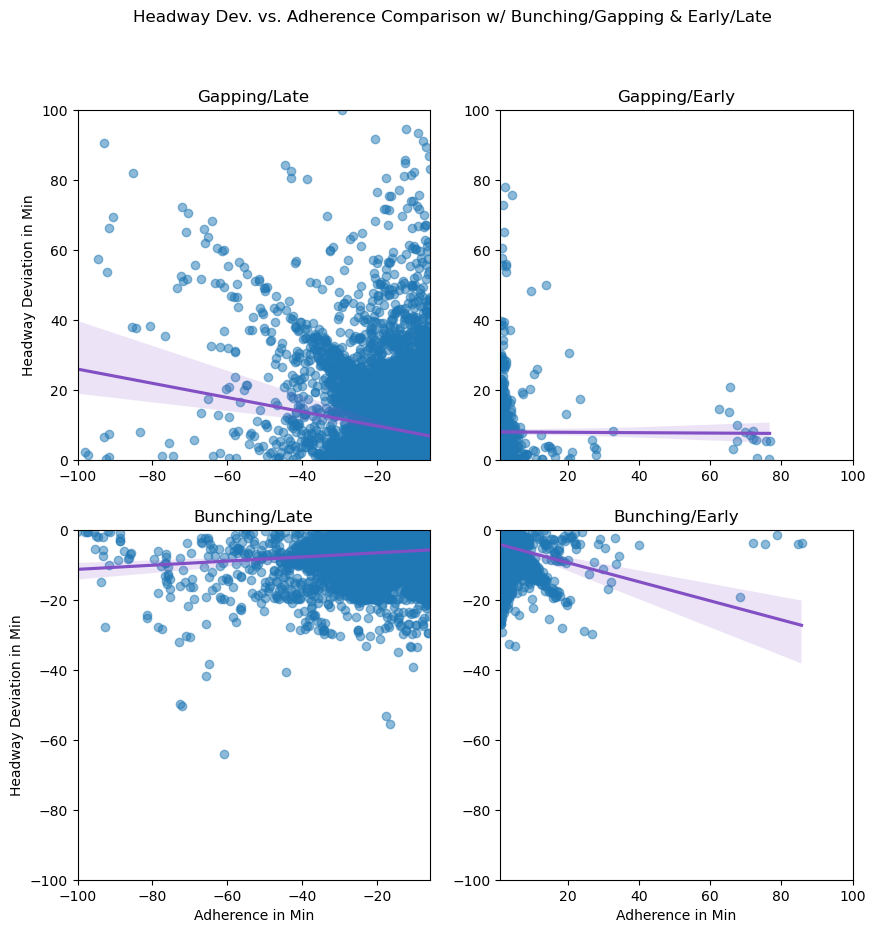

In [447]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Headway Dev. vs. Adherence Comparison w/ Bunching/Gapping & Early/Late')

sns.regplot(x = gapping_late['ADHERENCE'],
    y = gapping_late['HDWY_DEV'],
    line_kws = {'color':'#8250C4'},
    scatter_kws = {'alpha':0.5},
    ax = axes[0,0])
axes[0,0].set_title('Gapping/Late')
axes[0,0].set_xlim(-100,-6)
axes[0,0].set_ylim(0,100)
axes[0,0].set_ylabel('Headway Deviation in Min')
axes[0,0].set_xlabel('')

sns.regplot(x = gapping_early['ADHERENCE'],
    y = gapping_early['HDWY_DEV'],
    line_kws = {'color':'#8250C4'},
    scatter_kws = {'alpha':0.5},
    ax = axes[0,1])
axes[0,1].set_title('Gapping/Early')
axes[0,1].set_xlim(1,100)
axes[0,1].set_ylim(0,100)
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('')

sns.regplot(x = bunching_late['ADHERENCE'],
    y = bunching_late['HDWY_DEV'],
    line_kws = {'color':'#8250C4'},
    scatter_kws = {'alpha':0.5},
    ax = axes[1,0])
axes[1,0].set_title('Bunching/Late')
axes[1,0].set_xlim(-100,-6)
axes[1,0].set_ylim(-100,0)
axes[1,0].set_ylabel('Headway Deviation in Min')
axes[1,0].set_xlabel('Adherence in Min')

sns.regplot(x = bunching_early['ADHERENCE'],
    y = bunching_early['HDWY_DEV'],
    line_kws = {'color':'#8250C4'},
    scatter_kws = {'alpha':0.5},
    ax = axes[1,1])
axes[1,1].set_title('Bunching/Early')
axes[1,1].set_xlim(1,100)
axes[1,1].set_ylim(-100,0)
axes[1,1].set_ylabel('')
axes[1,1].set_xlabel('Adherence in Min')

### Stats

In [274]:
bunching_total = wego.loc[wego['HDWY_DEV'] < 0]

In [276]:
gapping_total = wego.loc[wego['HDWY_DEV'] > 0]

In [342]:
gapping_total = gapping_total['ADJUSTED_ONTIME_COUNT'].sum()+gapping_total['ADJUSTED_EARLY_COUNT'].sum()+gapping_total['ADJUSTED_LATE_COUNT'].sum()

In [344]:
bunching_total = bunching_total['ADJUSTED_ONTIME_COUNT'].sum()+bunching_total['ADJUSTED_EARLY_COUNT'].sum()+bunching_total['ADJUSTED_LATE_COUNT'].sum()

In [346]:
gapping_total

134089

In [348]:
bunching_total

131044

In [364]:
bunching_late['ADJUSTED_LATE_COUNT'].sum()

10514

In [350]:
(bunching_late['ADJUSTED_LATE_COUNT'].sum()/bunching_total)*100

8.0232593632673

In [362]:
bunching_early['ADJUSTED_EARLY_COUNT'].sum()

8134

In [352]:
(bunching_early['ADJUSTED_EARLY_COUNT'].sum()/bunching_total)*100

6.207075486096273

In [360]:
gapping_late['ADJUSTED_LATE_COUNT'].sum()

35300

In [354]:
(gapping_late['ADJUSTED_LATE_COUNT'].sum()/gapping_total)*100

26.32579853679273

In [358]:
gapping_early['ADJUSTED_EARLY_COUNT'].sum()

624

In [356]:
(gapping_early['ADJUSTED_EARLY_COUNT'].sum()/gapping_total)*100

0.46536255770421137

In [297]:
bunching_late[['HDWY_DEV', 'ADHERENCE']].corr()

,HDWY_DEV,ADHERENCE
HDWY_DEV,1.000000,0.194551
ADHERENCE,0.194551,1.000000


In [299]:
bunching_early[['HDWY_DEV', 'ADHERENCE']].corr()

,HDWY_DEV,ADHERENCE
HDWY_DEV,1.000000,-0.244592
ADHERENCE,-0.244592,1.000000


In [301]:
gapping_late[['HDWY_DEV', 'ADHERENCE']].corr()

,HDWY_DEV,ADHERENCE
HDWY_DEV,1.000000,-0.245816
ADHERENCE,-0.245816,1.000000


In [303]:
gapping_early[['HDWY_DEV', 'ADHERENCE']].corr()

,HDWY_DEV,ADHERENCE
HDWY_DEV,1.000000,-0.005478
ADHERENCE,-0.005478,1.000000


### Adherence vs. Headway DEV based on Time of Day

In [111]:
not_ontime_tod = time_of_day.loc[(time_of_day['ADJUSTED_EARLY_COUNT'] == 1) | (time_of_day['ADJUSTED_LATE_COUNT'] == 1)]

In [112]:
not_ontime_tod = not_ontime_tod.dropna()

In [241]:
not_ontime_tod['Hour'] = not_ontime_tod['Hour'].astype(int)

In [245]:
early_morning = not_ontime_tod.loc[(not_ontime_tod['Hour'] >= 0) & (not_ontime_tod['Hour'] <= 5)]

In [247]:
morning = not_ontime_tod.loc[(not_ontime_tod['Hour'] >= 6) & (not_ontime_tod['Hour'] <= 11)]

In [249]:
afternoon = not_ontime_tod.loc[(not_ontime_tod['Hour'] >= 12) & (not_ontime_tod['Hour'] <= 17)]

In [251]:
evening = not_ontime_tod.loc[(not_ontime_tod['Hour'] >= 18) & (not_ontime_tod['Hour'] <= 23)]

Text(0.5, 0, 'Adherence in Min')

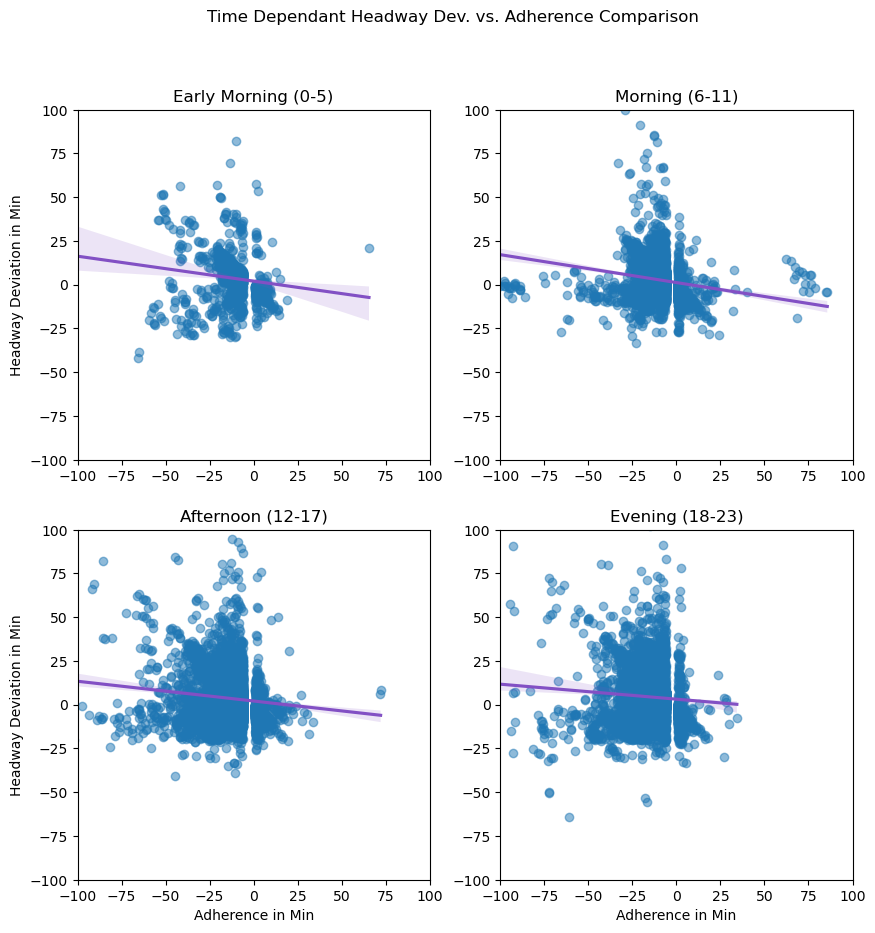

In [449]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Time Dependant Headway Dev. vs. Adherence Comparison')

sns.regplot(x = early_morning['ADHERENCE'],
    y = early_morning['HDWY_DEV'],
    line_kws = {'color':'#8250C4'},
    scatter_kws = {'alpha':0.5},
    ax = axes[0,0])
axes[0,0].set_title('Early Morning (0-5)')
axes[0,0].set_xlim(-100,100)
axes[0,0].set_ylim(-100,100)
axes[0,0].set_ylabel('Headway Deviation in Min')
axes[0,0].set_xlabel('')

sns.regplot(x = morning['ADHERENCE'],
    y = morning['HDWY_DEV'],
    line_kws = {'color':'#8250C4'},
    scatter_kws = {'alpha':0.5},
    ax = axes[0,1])
axes[0,1].set_title('Morning (6-11)')
axes[0,1].set_xlim(-100,100)
axes[0,1].set_ylim(-100,100)
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('')

sns.regplot(x = afternoon['ADHERENCE'],
    y = afternoon['HDWY_DEV'],
    line_kws = {'color':'#8250C4'},
    scatter_kws = {'alpha':0.5},
    ax = axes[1,0])
axes[1,0].set_title('Afternoon (12-17)')
axes[1,0].set_xlim(-100,100)
axes[1,0].set_ylim(-100,100)
axes[1,0].set_ylabel('Headway Deviation in Min')
axes[1,0].set_xlabel('Adherence in Min')

sns.regplot(x = evening['ADHERENCE'],
    y = evening['HDWY_DEV'],
    line_kws = {'color':'#8250C4'},
    scatter_kws = {'alpha':0.5},
    ax = axes[1,1])
axes[1,1].set_title('Evening (18-23)')
axes[1,1].set_xlim(-100,100)
axes[1,1].set_ylim(-100,100)
axes[1,1].set_ylabel('')
axes[1,1].set_xlabel('Adherence in Min')

### Stats

In [308]:
early_morning[['HDWY_DEV', 'ADHERENCE']].corr()

,HDWY_DEV,ADHERENCE
HDWY_DEV,1.000000,-0.128128
ADHERENCE,-0.128128,1.000000


In [310]:
morning[['HDWY_DEV', 'ADHERENCE']].corr()

,HDWY_DEV,ADHERENCE
HDWY_DEV,1.000000,-0.205678
ADHERENCE,-0.205678,1.000000


In [312]:
afternoon[['HDWY_DEV', 'ADHERENCE']].corr()

,HDWY_DEV,ADHERENCE
HDWY_DEV,1.000000,-0.139024
ADHERENCE,-0.139024,1.000000


In [314]:
evening[['HDWY_DEV', 'ADHERENCE']].corr()

,HDWY_DEV,ADHERENCE
HDWY_DEV,1.000000,-0.121831
ADHERENCE,-0.121831,1.000000


In [374]:
time_of_day.columns

Index(['ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE', 'HDWY_DEV',
       'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT',
       'Hour'],
      dtype='object')

In [378]:
time_of_day = time_of_day[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'Hour']]

In [384]:
time_of_day = time_of_day.dropna()

In [386]:
time_of_day['Hour'] = time_of_day['Hour'].astype(int)

In [388]:
early_morning_total = time_of_day.loc[(time_of_day['Hour'] >= 0) & (time_of_day['Hour'] <= 5)]

In [390]:
morning_total = time_of_day.loc[(time_of_day['Hour'] >= 6) & (time_of_day['Hour'] <= 11)]

In [392]:
afternoon_total = time_of_day.loc[(time_of_day['Hour'] >= 12) & (time_of_day['Hour'] <= 17)]

In [394]:
evening_total = time_of_day.loc[(time_of_day['Hour'] >= 18) & (time_of_day['Hour'] <= 23)]

In [408]:
early_morning_total['ADJUSTED_EARLY_COUNT'].sum()+early_morning_total['ADJUSTED_LATE_COUNT'].sum()+early_morning_total['ADJUSTED_ONTIME_COUNT'].sum()

16179

In [400]:
morning_total['ADJUSTED_EARLY_COUNT'].sum()+morning_total['ADJUSTED_LATE_COUNT'].sum()+morning_total['ADJUSTED_ONTIME_COUNT'].sum()

121591

In [402]:
afternoon_total['ADJUSTED_EARLY_COUNT'].sum()+afternoon_total['ADJUSTED_LATE_COUNT'].sum()+afternoon_total['ADJUSTED_ONTIME_COUNT'].sum()

124786

In [406]:
evening_total['ADJUSTED_EARLY_COUNT'].sum()+evening_total['ADJUSTED_LATE_COUNT'].sum()+evening_total['ADJUSTED_ONTIME_COUNT'].sum()

76305

In [410]:
early_morning_total['ADJUSTED_EARLY_COUNT'].sum()

859

In [412]:
early_morning_total['ADJUSTED_LATE_COUNT'].sum()

1549

In [414]:
morning_total['ADJUSTED_EARLY_COUNT'].sum()

3367

In [416]:
morning_total['ADJUSTED_LATE_COUNT'].sum()

16394

In [418]:
afternoon_total['ADJUSTED_EARLY_COUNT'].sum()

3676

In [420]:
afternoon_total['ADJUSTED_LATE_COUNT'].sum()

25995

In [422]:
evening_total['ADJUSTED_EARLY_COUNT'].sum()

1873

In [424]:
evening_total['ADJUSTED_LATE_COUNT'].sum()

15100